In [1]:
# Set current directory
%cd /home/jupyter/

/home/jupyter


In [ ]:
# Create a new model directory and copy the model parameters into this directory
!mkdir -p "model"
!cp "/home/jupyter/bert-joint-baseline/bert_config.json" "model/"
!cp "/home/jupyter/bert-joint-baseline/vocab-nq.txt" "model/"
!cp "/home/jupyter/bert-joint-baseline/bert_joint.ckpt.data-00000-of-00001" "model/"
!cp "/home/jupyter/bert-joint-baseline/bert_joint.ckpt.index" "model/"

#### Run this in TERMINAL to create Dockerfile

#### Run this in TERMINAL to create submission script

In [2]:
# Build the Docker image using Dockerfile and submission.sh in the current directory
IMAGE_NAME="nq-submission-bert-joint"
!docker build --tag=$IMAGE_NAME .

Sending build context to Docker daemon  1.341GB
Step 1/5 : FROM tensorflow/tensorflow:1.14.0-gpu-py3
 ---> a7a1861d2150
Step 2/5 : RUN pip install --upgrade pip
 ---> Using cache
 ---> 44fdf6aa1baf
Step 3/5 : RUN pip install --trusted-host pypi.python.org bert-tensorflow
 ---> Using cache
 ---> 5c588ef65f44
Step 4/5 : RUN pip install --trusted-host pypi.python.org natural-questions --no-dependencies
 ---> Using cache
 ---> 970f961db0f3
Step 5/5 : ADD . /nq_model
 ---> 97296f0a93c7
Successfully built 97296f0a93c7
Successfully tagged nq-submission-bert-joint:latest


#### Test Docker image on  dev set sample

In [ ]:
# Mount the small dev-sample into a temporary directory within the container
DATA_DIR="/tmp/nq-submission-test-data"
!mkdir -p "$DATA_DIR"
!gsutil cp -R "gs://bert-nq/tiny-dev" "$DATA_DIR"

# Run the Docker image with dev set as input and predictions.json as output
!docker run --runtime=nvidia -a stdin -a stdout -a stderr -v "$DATA_DIR":/data \
    "$IMAGE_NAME" bash "/nq_model/submission.sh" \
    "/data/tiny-dev/nq-dev-sample.jsonl.gz" \
    "/data/predictions.json"

In [4]:
# Check that prediction scores are compuated as expected
!python3 -m nq_eval \
  --gold_path="$DATA_DIR/tiny-dev/nq-dev-sample.jsonl.gz" \
  --predictions_path="$DATA_DIR/predictions.json"

/opt/conda/lib/python3.7/site-packages/absl/flags/_validators.py:359: UserWarning: Flag --gold_path has a non-None default value; therefore, mark_flag_as_required will pass even if flag is not specified in the command line!
  'command line!' % flag_name)
/opt/conda/lib/python3.7/site-packages/absl/flags/_validators.py:359: UserWarning: Flag --predictions_path has a non-None default value; therefore, mark_flag_as_required will pass even if flag is not specified in the command line!
  'command line!' % flag_name)
I0322 23:32:53.321207 140454025184640 eval_utils.py:261] parsing /tmp/nq-submission-test-data/tiny-dev/nq-dev-sample.jsonl.gz ..... 
I0322 23:32:56.733036 140454025184640 eval_utils.py:213] Reading predictions from file: /tmp/nq-submission-test-data/predictions.json
{"long-best-threshold-f1": 0.6325581395348837, "long-best-threshold-precision": 0.6071428571428571, "long-best-threshold-recall": 0.6601941747572816, "long-best-threshold": 5.9293248653411865, "long-recall-at-precisi

#### Docker Build Submission

In [1]:
# Authenticate and create docker build
!gcloud auth login
Y
!gcloud config set project natural-questions-v1
!gcloud builds submit --tag gcr.io/natural-questions-v1/nq-submission-bert-joint .


You are running on a Google Compute Engine virtual machine.
It is recommended that you use service accounts for authentication.

You can run:

  $ gcloud config set account `ACCOUNT`

to switch accounts if necessary.

Your credentials may be visible to others with access to this
virtual machine. Are you sure you want to authenticate with
your personal account?

Do you want to continue (Y/n)?  ^C


Command killed by keyboard interrupt

Updated property [core/project].
Creating temporary tarball archive of 16 file(s) totalling 1.2 GiB before compression.
Uploading tarball of [.] to [gs://natural-questions-v1_cloudbuild/source/1584923304.9-3d97c16d9850449b96b36bb20c962c72.tgz]
Created [https://cloudbuild.googleapis.com/v1/projects/natural-questions-v1/builds/c108bb97-9286-4241-ade1-615e2163ecce].
Logs are available at [https://console.cloud.google.com/cloud-build/builds/c108bb97-9286-4241-ade1-615e2163ecce?project=512516930043].
----------------------------- REMOTE BUILD OUTPUT ---------

#### Official Attempt Submission to Google Natural Questons Competition Results

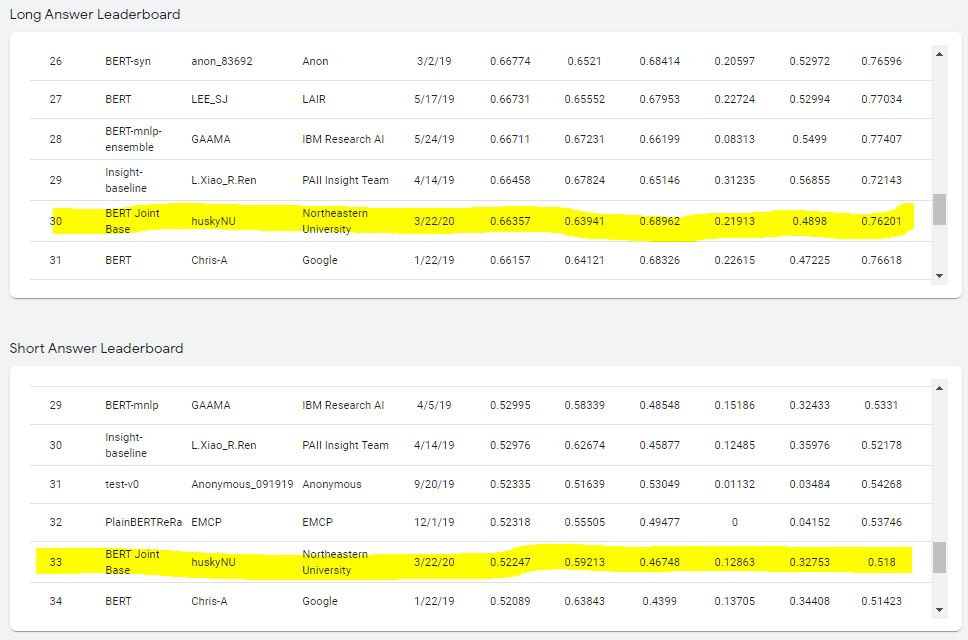